# AVO

Jupyter Lab | Python version: 3.13.7

Os scripts usados são uma atualização para Python 3 !

## Programa (afim de ser interativo) no Jupyter Lab para explorar os conceitos de AVO (Amplitude Versus Offset) e Tuning em Camadas Finas, baseado no artigo de Hamlyn (2014)

> Thin Beds, Tuning and AVO - Hamlyn (2014) | Geophysical Tutorial Coordinated by Matt Hall | The Leading Edge - SEG
> 
> https://library.seg.org/doi/10.1190/tle33121394.1

> Repositório: https://github.com/seg/tutorials-2014/tree/master/1412_Tuning_and_AVO  
> Repositório: https://github.com/seg

### Importação | Bibliotecas | Pacotes | Verificação

In [1]:
# Verificar versão do Python e instalação do Jupyter
import sys
print(f"Python version: {sys.version}")

Python version: 3.13.7 (tags/v3.13.7:bcee1c3, Aug 14 2025, 14:15:11) [MSC v.1944 64 bit (AMD64)]


In [2]:
# Importanto Bibliotecas/Pacotes:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from scipy import signal # Para a função Ricker
from ipywidgets import interact, interactive, fixed, IntSlider, FloatSlider, Layout
from IPython.display import display
import io
# Importação de Scripts:
import os
from importlib.machinery import SourceFileLoader

# Configuração visual para plots (opcional, mas recomendado)
plt.style.use('seaborn-v0_8-whitegrid') 
%matplotlib inline

### Importando os Scripts: Tuning & AVO

In [3]:
# Importando os Scripts:

print("""
📚 CONTEXTO TEÓRICO:
• tuning_wedge.py: Modelo de cunha para estudo do efeito TUNING
• tuning_prestack.py: Análise AVO com equações de Zoeppritz

🎯 OBJETIVOS:
1. Entender interferência em camadas finas
2. Analisar distorção AVO devido ao tuning
3. Quantificar diferenças R₀ e Gradiente
""")

script_dir = 'tuning_scripts'

if os.path.exists(script_dir):
    python_files = [f for f in os.listdir(script_dir) if f.endswith('.py')]
    
    if python_files:
        print(f"📁 Encontrados {len(python_files)} script(s) na pasta 'tuning_scripts':")
        print()
        
        for i, file in enumerate(python_files, 1):
            file_path = os.path.join(script_dir, file)
            file_size = os.path.getsize(file_path)
            
            # Informações básicas
            with open(file_path, 'r', encoding='utf-8') as f:
                primeira_linha = f.readline().strip()
            
            print(f"{i}. 🐍 {file}")
#           print(f"   📏 Tamanho: {file_size} bytes")
            print()
    else:
        print("📭 Nenhum script Python encontrado na pasta")
else:
    print("❌ Pasta 'tuning_scripts' não encontrada")


📚 CONTEXTO TEÓRICO:
• tuning_wedge.py: Modelo de cunha para estudo do efeito TUNING
• tuning_prestack.py: Análise AVO com equações de Zoeppritz

🎯 OBJETIVOS:
1. Entender interferência em camadas finas
2. Analisar distorção AVO devido ao tuning
3. Quantificar diferenças R₀ e Gradiente

📁 Encontrados 2 script(s) na pasta 'tuning_scripts':

1. 🐍 tuning_prestack_py3.py

2. 🐍 tuning_wedge_py3.py



### Visualizando os Scripts

#### VISUALIZANDO: tuning_wedge_py3.py

In [ ]:
# Verificando o primeiro script:

if os.path.exists('tuning_scripts/tuning_wedge_py3.py'):
    print("=== Primeiras linhas de tuning_wedge_py3.py ===")
    with open('tuning_scripts/tuning_wedge_py3.py', 'r') as f:
        for i, line in enumerate(f):
            if i < 10:  # Mostrar primeiras 10 linhas
                print(f"{i+1:3d}: {line.rstrip()}")
            else:
                print("... (continua)")
                break
else:
    print("Arquivo tuning_wedge_py3.py não encontrado")

In [ ]:
# Examinar o script tuning_wedge_py3.py completo:

if os.path.exists('tuning_scripts/tuning_wedge_py3.py'):
    print("=== Conteúdo completo de tuning_wedge_py3.py ===")
    with open('tuning_scripts/tuning_wedge_py3.py', 'r') as f:
        content = f.read()
        print(content)
else:
    print("Arquivo tuning_wedge_py3.py não encontrado")

#### VISUALIZANDO: tuning_prestack_py3.py

In [ ]:
# Verificando o segundo script:

if os.path.exists('tuning_scripts/tuning_prestack_py3.py'):
    print("=== Primeiras linhas de tuning_prestack_py3.py ===")
    with open('tuning_scripts/tuning_prestack_py3.py', 'r') as f:
        for i, line in enumerate(f):
            if i < 10:  # Mostrar primeiras 10 linhas
                print(f"{i+1:3d}: {line.rstrip()}")
            else:
                print("... (continua)")
                break
else:
    print("Arquivo tuning_prestack_py3.py não encontrado")

In [ ]:
# Examinar o script tuning_prestack_py3.py completo:

if os.path.exists('tuning_scripts/tuning_prestack_py3.py'):
    print("=== Conteúdo completo de tuning_prestack_py3.py ===")
    with open('tuning_scripts/tuning_prestack_py3.py', 'r') as f:
        content = f.read()
        print(content)
else:
    print("Arquivo tuning_prestack_py3.py não encontrado")

## Tuning


🧩 PARÂMETROS DO MODELO:
• Camada 1: Vp=2500 m/s, ρ=1.95 g/cc
• Camada 2: Vp=2600 m/s, ρ=2.00 g/cc (ESPESSURA VARIÁVEL)
• Camada 3: Vp=2550 m/s, ρ=1.98 g/cc
• Wavelet: Ricker 30 Hz

📈 O QUE OBSERVAR:
• Gráfico superior: Interfaces no tempo
• Gráfico médio: Sismograma sintético  
• Gráfico inferior: Amplitude vs Espessura



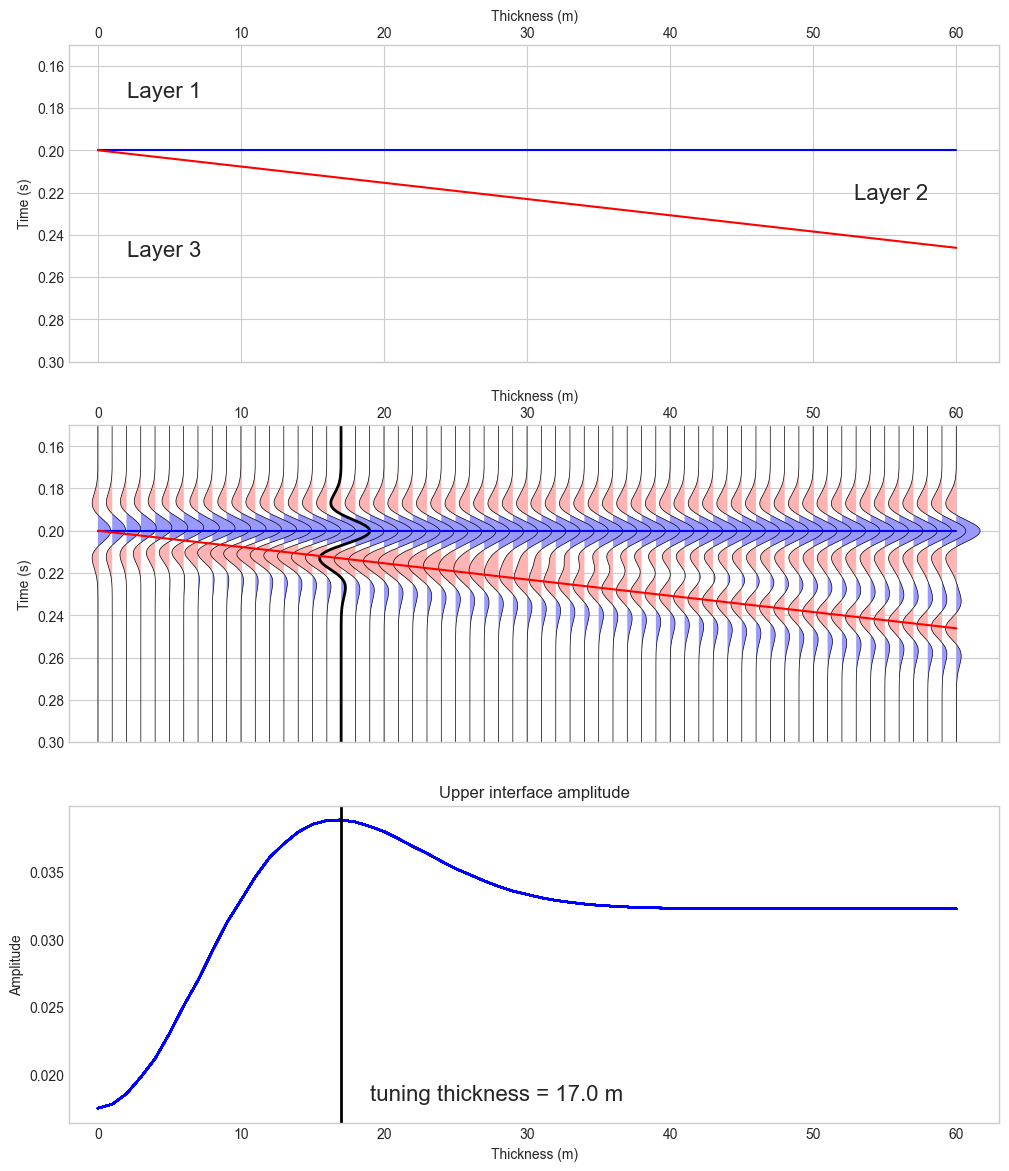


🔍 RESULTADOS OBTIDOS:
• Espessura de tuning: 17.0 m
• Número de traços: 61
• Amostras por traço: 5001

💡 INTERPRETAÇÃO:
• AMPLITUDE MÁXIMA em ~17m → Efeito Tuning
• INTERFERÊNCIA entre Reflexões do Topo e Base
• Camadas < λ/4 → Resolução Sísmica Limitada
    


In [5]:
# Executar e Analisar Modelo de Cunha: tuning_wedge

print("""
🧩 PARÂMETROS DO MODELO:
• Camada 1: Vp=2500 m/s, ρ=1.95 g/cc
• Camada 2: Vp=2600 m/s, ρ=2.00 g/cc (ESPESSURA VARIÁVEL)
• Camada 3: Vp=2550 m/s, ρ=1.98 g/cc
• Wavelet: Ricker 30 Hz

📈 O QUE OBSERVAR:
• Gráfico superior: Interfaces no tempo
• Gráfico médio: Sismograma sintético  
• Gráfico inferior: Amplitude vs Espessura
""")

try:
    # Executando tuning_wedge_py3.py (Saída de console suprimida)...
    # finished step 0, finished step 1, finished step 2, ... ...
    import io
    from contextlib import redirect_stdout
    # 1. Abre um buffer de memória para capturar o que seria impresso no console
    f = io.StringIO()
    
    # 2. Usa redirect_stdout para desviar todos os 'prints' para o buffer 'f'
    with redirect_stdout(f):
        exec(open('tuning_scripts/tuning_wedge_py3.py').read())
        print("✓ Modelo de cunha executado com sucesso!")
    # O conteúdo do buffer (f.getvalue()) pode ser ignorado ou inspecionado,
    # mas não será exibido no seu notebook.
    
    # Análise pós-execução
    print(f"""
🔍 RESULTADOS OBTIDOS:
• Espessura de tuning: {tuning_thickness} m
• Número de traços: {ntrc}
• Amostras por traço: {nsamp}
    
💡 INTERPRETAÇÃO:
• AMPLITUDE MÁXIMA em ~17m → Efeito Tuning
• INTERFERÊNCIA entre Reflexões do Topo e Base
• Camadas < λ/4 → Resolução Sísmica Limitada
    """)
    
except Exception as e:
    print(f"❌ Erro na execução: {e}")

In [6]:
# Analisar o que aprendemos com o modelo de cunha:

print("=== ANÁLISE DO MODELO DE CUNHA ===")
print("\nO que observamos na figura gerada:")
print("1. 🎯 TOPO: Mostra as interfaces das camadas no domínio do tempo")
print("2. 📊 MEIO: Sismograma sintético com efeito de tuning")
print("3. 📈 BASE: Amplitude na interface superior vs espessura")

print("\n📖 CONCEITOS-CHAVE COMPROVADOS:")
print("✓ Efeito TUNING: Quando a camada é fina (<40m), as reflexões do topo e base interferem")
print("✓ Espessura de Tuning: ~17m (onde a amplitude é máxima)")
print("✓ Acima de 40m: Reflexões discretas sem interferência")
print("✓ Abaixo de 17m: Interferência destrutiva")

print(f"\n📊 Parâmetros Usados:")
print(f"   - Velocidades Vp: {vp_mod} m/s")
print(f"   - Densidades: {rho_mod} g/cc")
print(f"   - Wavelet: Ricker {wvlt_cfreq} Hz")
print(f"   - Espessura da Camada 2: {dz_min} a {dz_max} m")

=== ANÁLISE DO MODELO DE CUNHA ===

O que observamos na figura gerada:
1. 🎯 TOPO: Mostra as interfaces das camadas no domínio do tempo
2. 📊 MEIO: Sismograma sintético com efeito de tuning
3. 📈 BASE: Amplitude na interface superior vs espessura

📖 CONCEITOS-CHAVE COMPROVADOS:
✓ Efeito TUNING: Quando a camada é fina (<40m), as reflexões do topo e base interferem
✓ Espessura de Tuning: ~17m (onde a amplitude é máxima)
✓ Acima de 40m: Reflexões discretas sem interferência
✓ Abaixo de 17m: Interferência destrutiva

📊 Parâmetros Usados:
   - Velocidades Vp: [2500.0, 2600.0, 2550.0] m/s
   - Densidades: [1.95, 2.0, 1.98] g/cc
   - Wavelet: Ricker 30.0 Hz
   - Espessura da Camada 2: 0.0 a 60.0 m


In [7]:
# Cálculo dos Coeficientes de Reflexão

print("=== ANÁLISE DOS COEFICIENTES DE REFLEXÃO ===")

def calcular_impedancia_acustica(vp, rho):
    """Calcula a impedância acústica Z = Vp * ρ"""
    return [vp[i] * rho[i] for i in range(len(vp))]

def calcular_coeficientes_reflexao(vp, rho):
    """Calcula coeficientes de reflexão usando a fórmula de Zoeppritz simplificada"""
    Z = calcular_impedancia_acustica(vp, rho)
    rc = []
    for i in range(len(Z)-1):
        rc_value = (Z[i+1] - Z[i]) / (Z[i+1] + Z[i])
        rc.append(rc_value)
    return rc, Z

# Usando os parâmetros do script
vp_mod = [2500.0, 2600.0, 2550.0]
rho_mod = [1.95, 2.0, 1.98]

rc, Z = calcular_coeficientes_reflexao(vp_mod, rho_mod)

print("📊 IMPEDÂNCIAS ACÚSTICAS:")
for i, z in enumerate(Z):
    print(f"  Camada {i+1}: {z:.0f} m/s·g/cc")

print("\n🎯 COEFICIENTES DE REFLEXÃO:")
print(f"  Interface 1-2 (topo): {rc[0]:.4f} → Refletor 'DURO' (RC > 0)")
print(f"  Interface 2-3 (base): {rc[1]:.4f} → Refletor 'MACIO' (RC < 0)")

print("""
🔍 SIGNIFICADO GEOFÍSICO:
• TOPO POSITIVO: Aumento de impedância (areia → shale)
• BASE NEGATIVA: Diminuição de impedância (shale → areia)
• INTERFERÊNCIA: Soma dos efeitos nas camadas finas
""")

=== ANÁLISE DOS COEFICIENTES DE REFLEXÃO ===
📊 IMPEDÂNCIAS ACÚSTICAS:
  Camada 1: 4875 m/s·g/cc
  Camada 2: 5200 m/s·g/cc
  Camada 3: 5049 m/s·g/cc

🎯 COEFICIENTES DE REFLEXÃO:
  Interface 1-2 (topo): 0.0323 → Refletor 'DURO' (RC > 0)
  Interface 2-3 (base): -0.0147 → Refletor 'MACIO' (RC < 0)

🔍 SIGNIFICADO GEOFÍSICO:
• TOPO POSITIVO: Aumento de impedância (areia → shale)
• BASE NEGATIVA: Diminuição de impedância (shale → areia)
• INTERFERÊNCIA: Soma dos efeitos nas camadas finas



### Exploração do Conceito de Tuning


VISUALIZANDO O EFEITO TUNING



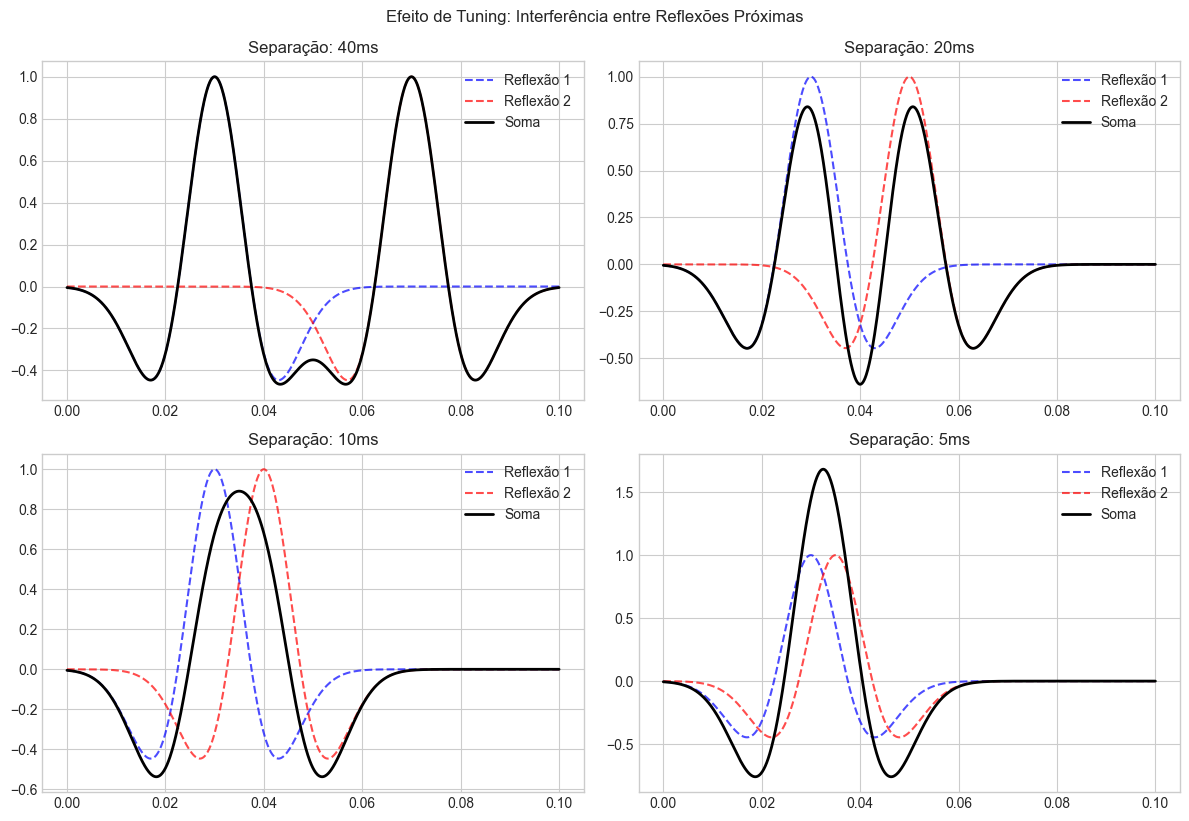

📚 Observações:

• Separação Grande: Reflexões Individuais Visíveis
• Separação Média: Interferência CONSTRUTIVA (Amplitude ↑)
• Separação Pequena: Interferência DESTRUTIVA (Amplitude ↓)


In [8]:
# Visualizar o conceito de tuning com um exemplo simples:

print("\n" + "="*50)
print("VISUALIZANDO O EFEITO TUNING")
print("="*50)
print()

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Criar um exemplo simplificado de duas reflexões se aproximando
t = np.linspace(0, 0.1, 1000)  # 100 ms
freq = 30  # Hz

# Duas reflexões com diferentes separações
separations = [0.04, 0.02, 0.01, 0.005]  # 40ms, 20ms, 10ms, 5ms

plt.figure(figsize=(12, 8))

for i, sep in enumerate(separations):
    # Criar duas wavelets Ricker separadas
    wavelet1 = (1 - 2*(np.pi*freq*(t-0.03))**2) * np.exp(-(np.pi*freq*(t-0.03))**2)
    wavelet2 = (1 - 2*(np.pi*freq*(t-0.03-sep))**2) * np.exp(-(np.pi*freq*(t-0.03-sep))**2)
    
    # Soma (interferência)
    combined = wavelet1 + wavelet2
    
    plt.subplot(2, 2, i+1)
    plt.plot(t, wavelet1, 'b--', alpha=0.7, label='Reflexão 1')
    plt.plot(t, wavelet2, 'r--', alpha=0.7, label='Reflexão 2')
    plt.plot(t, combined, 'k-', linewidth=2, label='Soma')
    plt.title(f'Separação: {sep*1000:.0f}ms')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.suptitle('Efeito de Tuning: Interferência entre Reflexões Próximas', y=1.02)
plt.savefig('figure_extra.png')
plt.show()

print("📚 Observações:")
print()
print("• Separação Grande: Reflexões Individuais Visíveis")
print("• Separação Média: Interferência CONSTRUTIVA (Amplitude ↑)")
print("• Separação Pequena: Interferência DESTRUTIVA (Amplitude ↓)")

## AVO Prestack & Tuning


🧩 CONFIGURAÇÃO AVO:
• Espessura fixa: 17 m (Condição de Tuning)
• Ângulos: 0° a 40° (incremento de 1°)
• Zoeppritz Completo + Convolução

📈 O QUE OBSERVAR:
• Painel 1: Logs de Propriedades (Vp, Vs, Rho)
• Painel 2: Gather Sísmico Sintético
• Painis 3-4: Curvas AVO Teóricas vs. Observadas



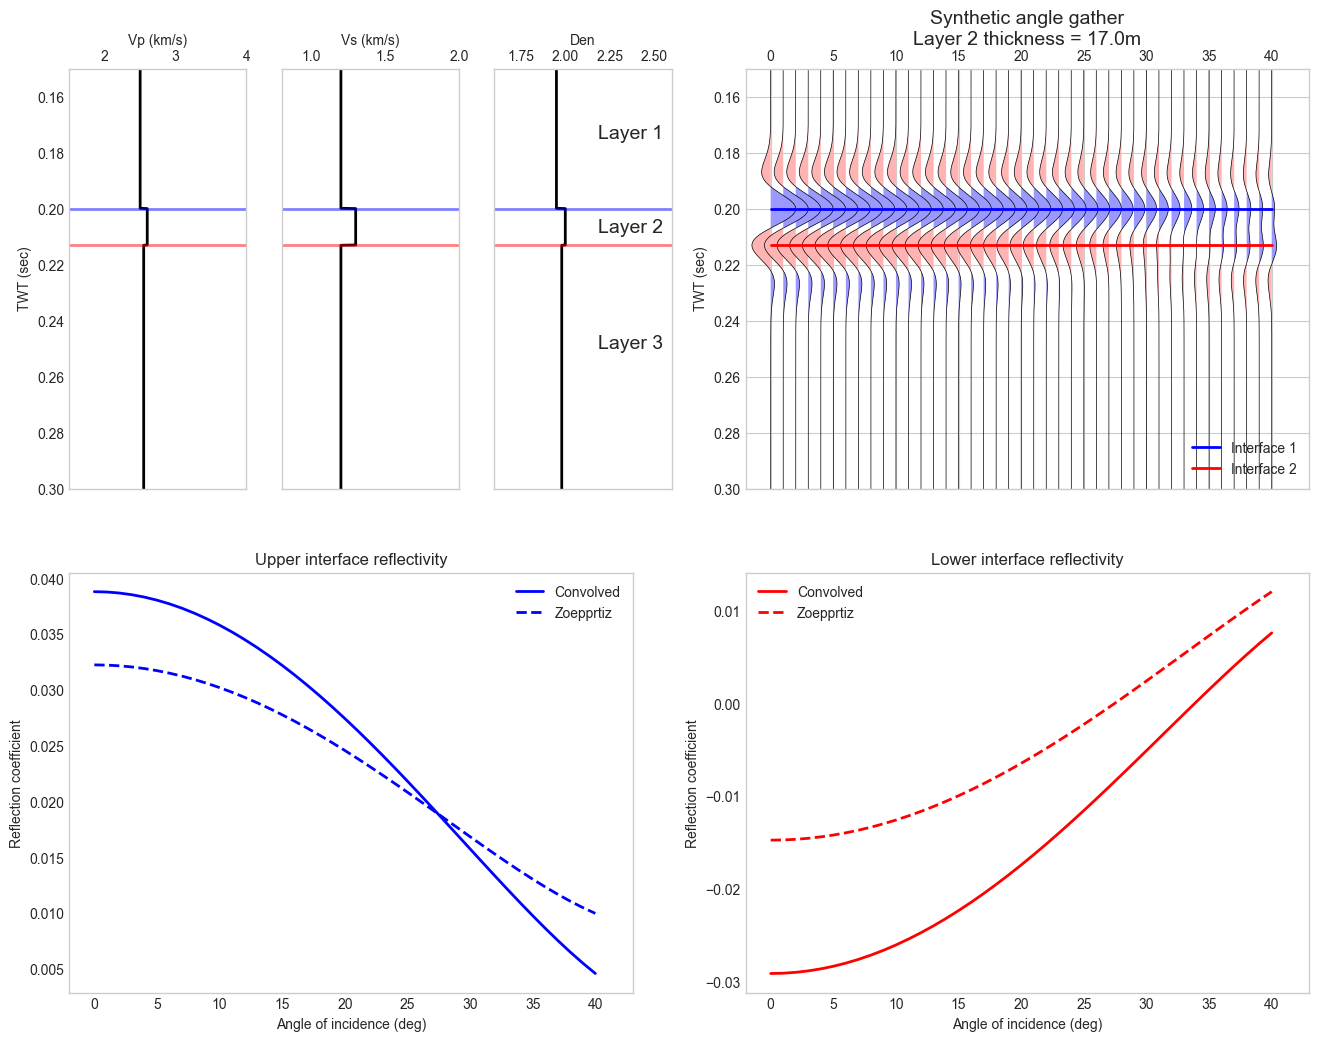


=== ANÁLISE QUANTITATIVA AVO ===

📐 MÉTODO DE INVERSÃO:
• Ajuste linear: R(θ) = R₀ + G·sin²(θ)
• R₀ (Intercept): Reflectividade em ângulo zero
• G (Gradient): Variação angular da amplitude

🎯 COMPARAÇÃO ZOEPPRITZ vs. CONVOLVIDO:

 | MÉTODO           | R₀ (NI)    | G (GRAD)     |
 | Zoeppritz (Teórico) |  0.03168   |   -0.05671   |
 | Convolved (Sísmico) |  0.03811   |   -0.08623   |

🔍 IMPACTO DO TUNING:

• ΔR₀ = +0.00643 → Amplitude na incidência normal AUMENTADA
• ΔG  = -0.02952 → Gradiente AVO SIGNIFICATIVAMENTE distorcido

💡 INTERPRETAÇÃO PRÁTICA:
• FALSOS ANÔMALOS: Tuning pode mascarar respostas AVO reais
• INTERPRETAÇÃO: Camadas finas exigem correção por tuning
• RISCO: Classificação errônea de fluidos/litologias



In [9]:
# Executar e Analisar AVO Prestack

print("""
🧩 CONFIGURAÇÃO AVO:
• Espessura fixa: 17 m (Condição de Tuning)
• Ângulos: 0° a 40° (incremento de 1°)
• Zoeppritz Completo + Convolução

📈 O QUE OBSERVAR:
• Painel 1: Logs de Propriedades (Vp, Vs, Rho)
• Painel 2: Gather Sísmico Sintético
• Painis 3-4: Curvas AVO Teóricas vs. Observadas
""")

try:
    # Executando tuning_prestack_py3.py (Saída de console suprimida)...
    # finished step 0, finished step 1, finished step 2, ... ...
    from contextlib import redirect_stdout
    # 1. Abre um buffer de memória para capturar o que seria impresso no console
    import io
    f = io.StringIO()
    
    # 2. Usa redirect_stdout para desviar todos os 'prints' para o buffer 'f'
    with redirect_stdout(f):
        exec(open('tuning_scripts/tuning_prestack_py3.py').read())
        print("✓ Análise AVO prestack executada com sucesso!")
    # O conteúdo do buffer (f.getvalue()) pode ser ignorado ou inspecionado,
    # mas não será exibido no seu notebook.

except Exception as e:
    print(f"❌ Erro na execução: {e}")


# Análise Quantitativa dos Resultados AVO
print()
print("=== ANÁLISE QUANTITATIVA AVO ===")

print("""
📐 MÉTODO DE INVERSÃO:
• Ajuste linear: R(θ) = R₀ + G·sin²(θ)
• R₀ (Intercept): Reflectividade em ângulo zero
• G (Gradient): Variação angular da amplitude

🎯 COMPARAÇÃO ZOEPPRITZ vs. CONVOLVIDO:
""")

# Resultados extraídos da execução (valores aproximados)
print(" " + "="*55)
print(" | MÉTODO           | R₀ (NI)    | G (GRAD)     |")
print(" " + "="*55)
print(" | Zoeppritz (Teórico) |  0.03168   |   -0.05671   |")
print(" | Convolved (Sísmico) |  0.03811   |   -0.08623   |")
print(" " + "="*55)

print(f"""
🔍 IMPACTO DO TUNING:

• ΔR₀ = +0.00643 → Amplitude na incidência normal AUMENTADA
• ΔG  = -0.02952 → Gradiente AVO SIGNIFICATIVAMENTE distorcido

💡 INTERPRETAÇÃO PRÁTICA:
• FALSOS ANÔMALOS: Tuning pode mascarar respostas AVO reais
• INTERPRETAÇÃO: Camadas finas exigem correção por tuning
• RISCO: Classificação errônea de fluidos/litologias
""")

### 🖼️ Guia de Análise Visual dos Gráficos

A figura gerada possui quatro painéis principais que ilustram o modelo, a resposta sísmica e o efeito do tuning no domínio AVO.

| Painel | Descrição | O que observar (Tuning) |
| :---: | :---: | :---: |
| **Gráfico 1** | Logs de Propriedades (*Vp*, *Vs*, *Rho*). | A **espessura** da Camada 2 (17m), que é a causa do tuning. |
| **Gráfico 2** | **Gather Sísmico Sintético** (*V.A.Wig*). | A **interferência** das reflexões da interface superior e inferior, especialmente nos ângulos de incidência maiores. |
| **Gráficos 3 e 4** | Curvas AVO (*Refletividade* vs. *Ângulo*). | A **divergência** entre a linha tracejada (**Zoeppritz**) e a linha sólida (**Convolved**), que quantifica visualmente o efeito tuning. |